# BDSI Python 102

Date: June 13, 2017

Instructor: Jonathan Stroud (stroud@umich.edu)

***************************************************************************
***************************************************************************

# Pandas

_The Python Data Analysis Library (Pandas)_ is a python package for storing and manipulating data tables in Python.

In [2]:
import pandas as pd

## Creating DataFrames

The two important structures for `pandas` is the `Series` and the `DataFrame`.  Let's start with `DataFrame`s.  

Data: a few lists

In [3]:
names = ['John', 'Matt', 'Sara', 'Jim', 'Ashley']
ids = [ 23, 34, 83, 86, 12]
balance = [10.2, 84.3, 72.9, 27.1, 223.1]

### Dictionaries

In [4]:
dic = {'ids': ids, 'names': names, 'bal':balance}

users = pd.DataFrame(dic)
print users

     bal  ids   names
0   10.2   23    John
1   84.3   34    Matt
2   72.9   83    Sara
3   27.1   86     Jim
4  223.1   12  Ashley


In [5]:
users = pd.DataFrame({'names': names, 'bal':balance}, index=ids)
print users

      bal   names
23   10.2    John
34   84.3    Matt
83   72.9    Sara
86   27.1     Jim
12  223.1  Ashley


### Reading from a file

This example uses data from the sinking of the RMS Titanic. The data was downloaded from a Kaggle competition: https://www.kaggle.com/c/titanic 

In [6]:
titanic = pd.read_csv('titanic.csv', index_col=0)
titanic.head(3) # First 3 items

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Selecting data

There are several ways to access the row and column data.

### Rows, the `ix` method

In [7]:
titanic.ix[1]

Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                              22
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 1, dtype: object

In [8]:
titanic.ix[1:5]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
rows_a = [1,37,100]
titanic.ix[rows_a]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
100,0,2,"Kantor, Mr. Sinai",male,34.0,1,0,244367,26.0000,NaN,S


### Column data

In [10]:
print titanic['Name'].head()
print titanic.Name.head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object
PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object


In [11]:
cols_a = ['Name', 'Survived']
titanic[cols_a].head()

,Name,Survived
PassengerId,,
1,"Braund, Mr. Owen Harris",0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
3,"Heikkinen, Miss. Laina",1
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
5,"Allen, Mr. William Henry",0


Mix and match

In [12]:
titanic.ix[0:10, cols_a]

,Name,Survived
PassengerId,,
1,"Braund, Mr. Owen Harris",0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
3,"Heikkinen, Miss. Laina",1
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
5,"Allen, Mr. William Henry",0
6,"Moran, Mr. James",0
7,"McCarthy, Mr. Timothy J",0
8,"Palsson, Master. Gosta Leonard",0
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1


Or use the `.` (dot) notation.

In [13]:
titanic.Name.ix[0:10]

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

## Index objects

In [14]:
print titanic.index[:10]

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name=u'PassengerId')


Several types, including:

- MultiIndex
- DatatimeIndex
- PeriodIndex

### reset_index

In [15]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
titanic.reset_index().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
#users.reset_index(inplace=True)
tmp = titanic.reset_index()
tmp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### set_index

In [19]:
tmp = tmp.set_index('Name')

In [20]:
tmp

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
"Moran, Mr. James",6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S
"Palsson, Master. Gosta Leonard",8,0,3,male,2.0,3,1,349909,21.0750,NaN,S
"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,3,female,27.0,0,2,347742,11.1333,NaN,S


In [21]:
tmp.ix['Braund, Mr. Owen Harris']

PassengerId            1
Survived               0
Pclass                 3
Sex                 male
Age                   22
SibSp                  1
Parch                  0
Ticket         A/5 21171
Fare                7.25
Cabin                NaN
Embarked               S
Name: Braund, Mr. Owen Harris, dtype: object

## Essentials

### Filtering

In [22]:
print titanic.Survived == 1

PassengerId
1      False
2       True
3       True
4       True
5      False
6      False
7      False
8      False
9       True
10      True
11      True
12      True
13     False
14     False
15     False
16      True
17     False
18      True
19     False
20      True
21     False
22      True
23      True
24      True
25     False
26      True
27     False
28     False
29      True
30     False
       ...  
862    False
863     True
864    False
865    False
866     True
867     True
868    False
869    False
870     True
871    False
872     True
873    False
874    False
875     True
876     True
877    False
878    False
879    False
880     True
881     True
882    False
883    False
884    False
885    False
886    False
887    False
888     True
889    False
890     True
891    False
Name: Survived, dtype: bool


In [23]:
titanic[titanic.Survived == 1].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [24]:
titanic[titanic.Sex == 'female'].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [25]:
titanic.ix[titanic.Sex == 'female', ['Survived']].head()

,Survived
PassengerId,
2,1
3,1
4,1
9,1
10,1


In [26]:
mask1 = titanic.Sex == 'female'
mask2 = titanic.Age > 35.0

| Symbol | Task Performed |
|----|---|
| &#124; | elementwise or |
| & | elementwise and |

In [27]:
titanic[(mask1) | (mask2)].head() # All people who are either females or above 20

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [28]:
titanic[(mask1) & (mask2)].head() # All people who are female and above 20

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S


### Sorting

Sort the data

In [29]:
titanic.sort_values('Age').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [30]:
titanic.sort_values(['Age','Ticket'], ascending=[False,True]).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


What are the 10 most expensive fares?

In [31]:
titanic.sort_values('Fare', ascending=False).head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


What are the 10 oldest people who survived?

In [32]:
titanic[titanic.Survived == 1].sort_values('Age', ascending=False).head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S
367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C
269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


## Missing data

In [33]:
titanic.head(1) # Note the "NaN" in Cabin column

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


Drop any row with one or more `NaN`

In [34]:
print len(titanic.dropna())
print len(titanic) # note the original DF is unchanges

183
891


Check for `null` values for a column.

In [35]:
titanic.Cabin.isnull().head()

PassengerId
1     True
2    False
3     True
4    False
5     True
Name: Cabin, dtype: bool

In [36]:
print titanic.Cabin.isnull().mean()
print titanic.Age.isnull().mean()

0.771043771044
0.198653198653


Filling in missing values with `fillna()`.

In [37]:
print titanic.Age.fillna(0).head(10) # Fill with 0

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      0.0
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64


In [38]:
mn = titanic.Age.dropna().mean() # mean of non-missing values
print mn
print titanic.Age.fillna(mn).head(10) # Fill with mean

29.6991176471
PassengerId
1     22.000000
2     38.000000
3     26.000000
4     35.000000
5     35.000000
6     29.699118
7     54.000000
8      2.000000
9     27.000000
10    14.000000
Name: Age, dtype: float64


## Summarizing and describing

In [39]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
print titanic.count() # number of values, excluding NaNs

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64


In [41]:
print titanic.mean() # mean for each column

Survived     0.383838
Pclass       2.308642
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
dtype: float64


Several methods

    count, describe, min, max, argmin, argmax, sum, mean, median, var, std, pct_change


## Grouping

`groupby` makes a new object where the dataframe is split by a categorical variable. This allows us to easily process each group with the same operation.

In [43]:
survived_groups = titanic.groupby('Survived')
print survived_groups

In [45]:
survived_groups.mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [47]:
print survived_groups.Age.describe()

Survived       
0         count    424.000000
          mean      30.626179
          std       14.172110
          min        1.000000
          25%       21.000000
          50%       28.000000
          75%       39.000000
          max       74.000000
1         count    290.000000
          mean      28.343690
          std       14.950952
          min        0.420000
          25%       19.000000
          50%       28.000000
          75%       36.000000
          max       80.000000
Name: Age, dtype: float64


# Plotting Basics

_matplotlib_ is a python package that brings matlab-style plotting to Python. It also plays nicely with Jupyter.

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

## `scatter` : scatter plots

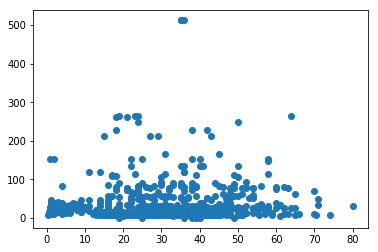

In [49]:
plt.scatter(titanic.Age, titanic.Fare) # Age (x-axis) vs. Fare (y-axis)

## `hist` : Histograms

(array([  54.,   46.,  177.,  169.,  118.,   70.,   45.,   24.,    9.,    2.]),
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 10 Patch objects>)

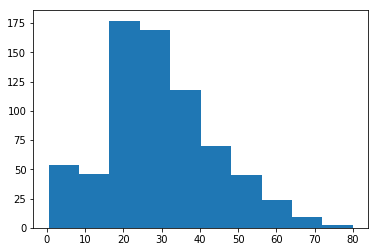

In [50]:
#plt.hist(titanic.Age) # Error! Need to drop NaNs first
plt.hist(titanic.Age.dropna())

By default, `hist` uses 10 bins. We can change it to whatever we want.

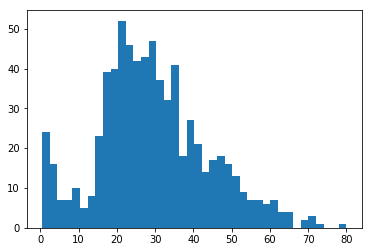

In [51]:
plt.hist(titanic.Age.dropna(), bins=40); # semicolon added to surpress some Jupyter output

## `plot`: line plots

The titanic dataset doesn't have any good line data, so we're going to make our own.

In [52]:
x = range(0, 100, 5)
y = [(x_i**2) for x_i in x]

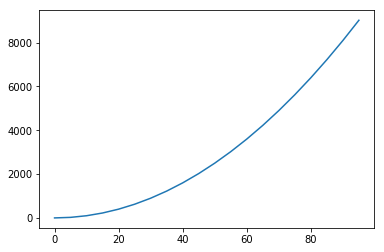

In [53]:
plt.plot(x, y) 

Multiple plots

In [54]:
x = [x_i/50.0 for x_i in range(-100, 101)]
y0 = [x_i**2 for x_i in x]
y1 = [x_i**3 for x_i in x]
y2 = [x_i**4 for x_i in x]

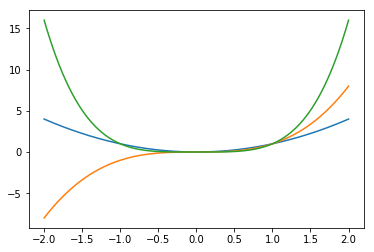

In [55]:
plt.plot(x, y0)
plt.plot(x, y1)
plt.plot(x, y2)

But which line is which?

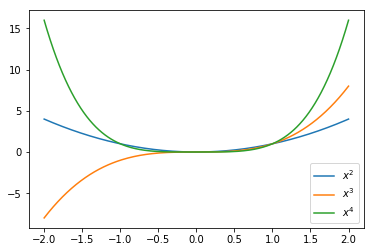

In [56]:
plt.plot(x, y0)
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(['$x^2$', '$x^3$', '$x^4$'])

**************
**************

# Exercise: Who survived the Titanic?

In this exercise, we'll explore the Titanic dataset further.

In [57]:
# Load the dataset again, just in case anything changed from before.
titanic = pd.read_csv('titanic.csv', index_col=0)

## 1. What is the average age of the survivors?

In [58]:
titanic[titanic.Survived == 1].Age.mean()

28.343689655172415

## 2. What fraction of men survived? What fraction of women survived?

In [59]:
print 'Men:', titanic[titanic.Sex == 'male'].Survived.mean()
print 'Women:', titanic[titanic.Sex == 'female'].Survived.mean()

Men: 0.188908145581
Women: 0.742038216561


## 3. What is the survival rate by Passenger class (Pclass)?

In [60]:
titanic.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

********
********

# Doing more with Python

Python has a _ton_ of great libraries for doing machine learning, data processing, numerical computing, and more. I've only been able to cover a small fraction of these packages. If you want to learn more, check out these packages.

### Basics

 - [Numpy](http://www.numpy.org/) - Numerical computing library. Many other libraries (including Pandas) are built on numpy.
 - [Scipy](https://www.scipy.org/) - Scientific computing library with functionality for many basic things like reading/writing images. Also used by many other libraries.
 - [Jupyter](http://jupyter.org/) - Notebooks with lots of cool functionality.
 - [Pandas](http://pandas.pydata.org/) - Brings R Dataframes to Python.

### Machine Learning

 - [Scikit-learn](http://scikit-learn.org/stable/) - Machine learning library with many useful functions for SVMs, Decision trees, etc.
 - [Tensorflow](https://www.tensorflow.org/) - Deep learning library from Google.
 - [PyTorch](http://pytorch.org/) - Deep learning library from Facebook.
 - [Theano](http://deeplearning.net/software/theano/) - Symbolic computation in Python. Listed here because it's used by some deep learning libraries.
 
### Statistics

 - [Statsmodels](http://www.statsmodels.org/stable/index.html) - Simple statistical models, GLMs, etc.
 - [PyMC](https://pymc-devs.github.io/pymc/) - Bayesian statistics package, Markov Chain Monte Carlo.
 - [PyMix](http://www.pymix.org/pymix/index.php?n=PyMix.Home) - Mixture models.

### Plotting

 - [Matplotlib](https://matplotlib.org/) - Matlab-style plots.
 - [Seaborn](https://seaborn.pydata.org/) - Statistics plotting library. Will include statistical tests and error bars in your plots automatically.
 - [Plotly](https://plot.ly/python/) - Interactive, web-enabled plots
 - [Basemap](https://matplotlib.org/basemap/) - Plotting with geographic maps.
 
### Misc

 - [BioPython](http://biopython.org/wiki/Biopython) - Biological computation
 - [NLTK](http://www.nltk.org/) - Natural language processing.
 - [Scrapy](https://scrapy.org/) - Web scraping.